=== Example 1: Fit Your Data ===
Thickness: 155.47 nm
S-surface: 0.5748
Saved: fit_result.pdf

=== Example 2: Depth Profiles ===
Saved: profiles.pdf


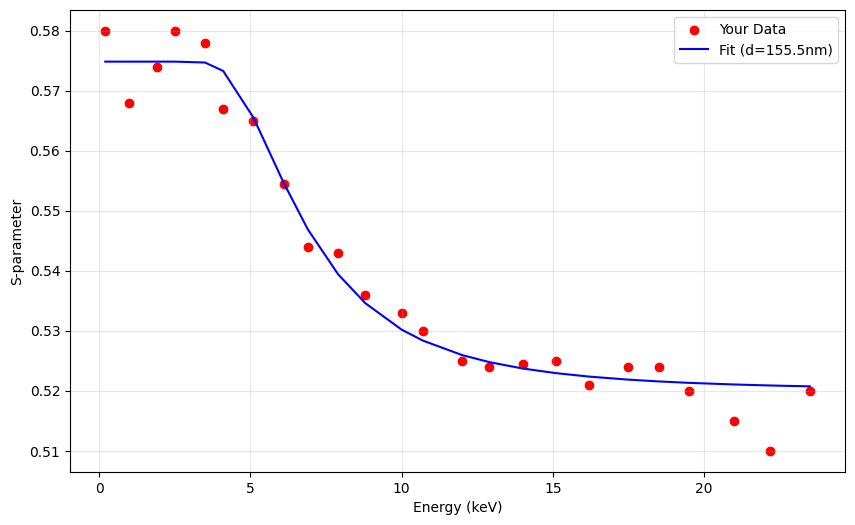

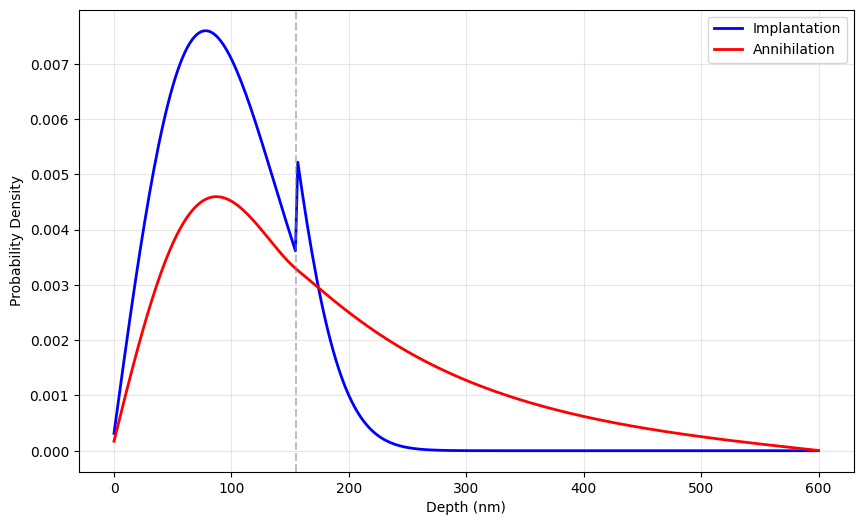

Running Numerical Graded Solver... (This may take a few seconds)
Fitted Thickness: 186.7 nm
Interface Blur Width: 1.1 nm


In [ ]:
"""Simple example using your code."""

import sys
sys.path.insert(0, r"C:\Users\jeanv\OneDrive - Delft University of Technology\Uitwisseling - TUDelft\Courses\MEP\Programming")  # Adds current directory to Python path


import numpy as np
import matplotlib.pyplot as plt
from pals_analysis import config
from pals_analysis.physics import makhov_profile, calculate_annihilation_profile
from pals_analysis.analysis import solve_for_thickness, fit_model
from pals_analysis.analysis.thickness_solver import plot_fit_result

# Example 1: Fit your experimental data
print("=== Example 1: Fit Your Data ===")
energies = config.YOUR_DATA[:, 0]
s_exp = config.YOUR_DATA[:, 1]

d_ox, s_surf = solve_for_thickness(energies, s_exp)
print(f"Thickness: {d_ox:.2f} nm")
print(f"S-surface: {s_surf:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(energies, s_exp, color='red', label='Your Data')
plt.plot(energies, fit_model(energies, d_ox, s_surf), 'b-', label=f'Fit (d={d_ox:.1f}nm)')
plt.xlabel('Energy (keV)')
plt.ylabel('S-parameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('fit_result.pdf')
print("Saved: fit_result.pdf\n")

# Example 2: Calculate depth profiles
print("=== Example 2: Depth Profiles ===")
layers = [
    {'thickness': 155, 'density': 5.24, 'L_diff': 30},
    {'thickness': 1000, 'density': 8.00, 'L_diff': 150}
]

z = np.linspace(0, 600, 300)
energy = 5.0

p_z = makhov_profile(z, energy, layers)
c_z = calculate_annihilation_profile(z, p_z, layers)

plt.figure(figsize=(10, 6))
plt.plot(z, p_z, 'b-', linewidth=2, label='Implantation')
plt.plot(z, c_z, 'r-', linewidth=2, label='Annihilation')
plt.axvline(155, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Depth (nm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('profiles.pdf')
print("Saved: profiles.pdf")

plt.show()


from pals_analysis.analysis.thickness_solver import solve_graded_model

d_fit, w_fit, s_fit = solve_graded_model(energies, s_exp)

print(f"Fitted Thickness: {d_fit:.1f} nm")
print(f"Interface Blur Width: {w_fit:.1f} nm")


# If you have error bars (s_err):
plot_fit_result(energies, s_exp, None, d_fit, w_fit, s_fit)
